# 单突变数据库[ProThermDB-single MPTherm-pred]

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tqdm
from sklearn.model_selection import train_test_split

# 0.data preprocessing functions

In [2]:
from Process4Dataset.initializor4PonDT import wash4MutTm, check4mult, duplicate4MutTm, delete4Dup, select4Dup

# 常规情况——不关注Tm与pH

In [3]:
columns = ["UniProt_ID", "Mutation", "Tm", "pH"]

## 1.ProThermDB

In [4]:
ProThermDB = pd.read_csv("BasicData/InitializationDataset/ProThermDB.tsv", sep="\t")[columns + ["ΔTm"]]
ProThermDB.sort_values(by=columns, inplace=True, ascending=False)
ProThermDB.reset_index(drop=True, inplace=True)
ProThermDB

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,W0TJ64,S176A (Based on Uniprot),-,8.0,80.4
1,W0TJ64,S176A (Based on Uniprot),-,8.0,78.2
2,W0TJ64,S176A (Based on Uniprot),-,8.0,78.4
3,W0TJ64,S176A (Based on Uniprot),-,8.0,79.8
4,W0TJ64,S176A (Based on Uniprot),-,8.0,80.4
...,...,...,...,...,...
9731,-,-,-,7.0,-
9732,-,-,-,7.0,-
9733,-,-,-,5.0,-
9734,-,-,-,5.0,-


### 1.1清洗数据[利用DatasetCreator4MutTm]

In [5]:
ProThermDB, ProThermDB_washed = wash4MutTm(ProThermDB, avg_filling=True, focus_columns=columns)
ProThermDB_washed

-删除数据缺失行及非法行共计4502行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-对于实验条件pH，利用平均值进行补充，而pH的平均值为6.42020 -由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,pH,ΔTm
10,S4WCF9,V571L (Based on UniProt),81,8.0,-
11,S4WCF9,V571L (Based on UniProt),72,8.0,-
12,S4WCF9,T586I (Based on UniProt),95,8.0,-
13,S4WCF9,L558S (Based on UniProt),73,8.0,-
14,S4WCF9,L558S (Based on UniProt),51,8.0,-
...,...,...,...,...,...
9731,-,-,-,7.0,-
9732,-,-,-,7.0,-
9733,-,-,-,5.0,-
9734,-,-,-,5.0,-


### 1.2.检测是否存在多测量值

In [6]:
ProThermDB_mult_cnt, ProThermDB_mult_index = check4mult(ProThermDB, columns)
ProThermDB_multiple_deltaTm = ProThermDB.iloc[ProThermDB_mult_index, :]
print(f"ProThermDB数据库中存在{ProThermDB_mult_cnt}条多测量值")

ProThermDB数据库中存在415条多测量值


### 1.3.针对多测量值进行处理

In [7]:
del_ProThermDB = duplicate4MutTm(ProThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB = duplicate4MutTm(ProThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,A0A060GYS1,H22R,88.0,7.5,9.9
1,A0A060GYS1,P224R,84.3,7.5,2.3
2,A0A410ZNC6,A341S,33.6,7.5,3.6
3,A0A410ZNC6,F184L,31.0,7.5,1.0
4,A0A410ZNC6,P250L,34.5,7.5,4.5
...,...,...,...,...,...
4759,R9S082,T52A,79.4,9.6,-2.8
4760,R9S082,T68A,81.7,9.6,-0.5
4761,R9S082,V115A,79.3,9.6,-2.9
4762,R9S082,V14A,80.9,9.6,-1.3


### 1.4.绘制ProThermDB分布图

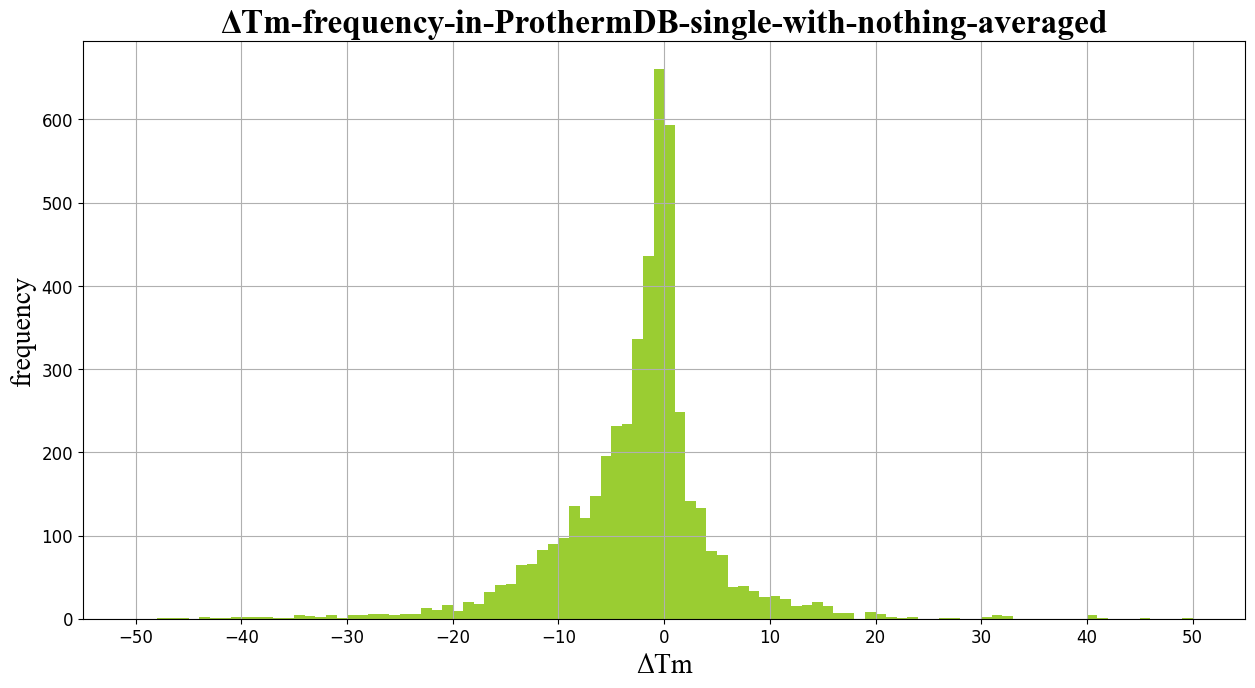

In [8]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

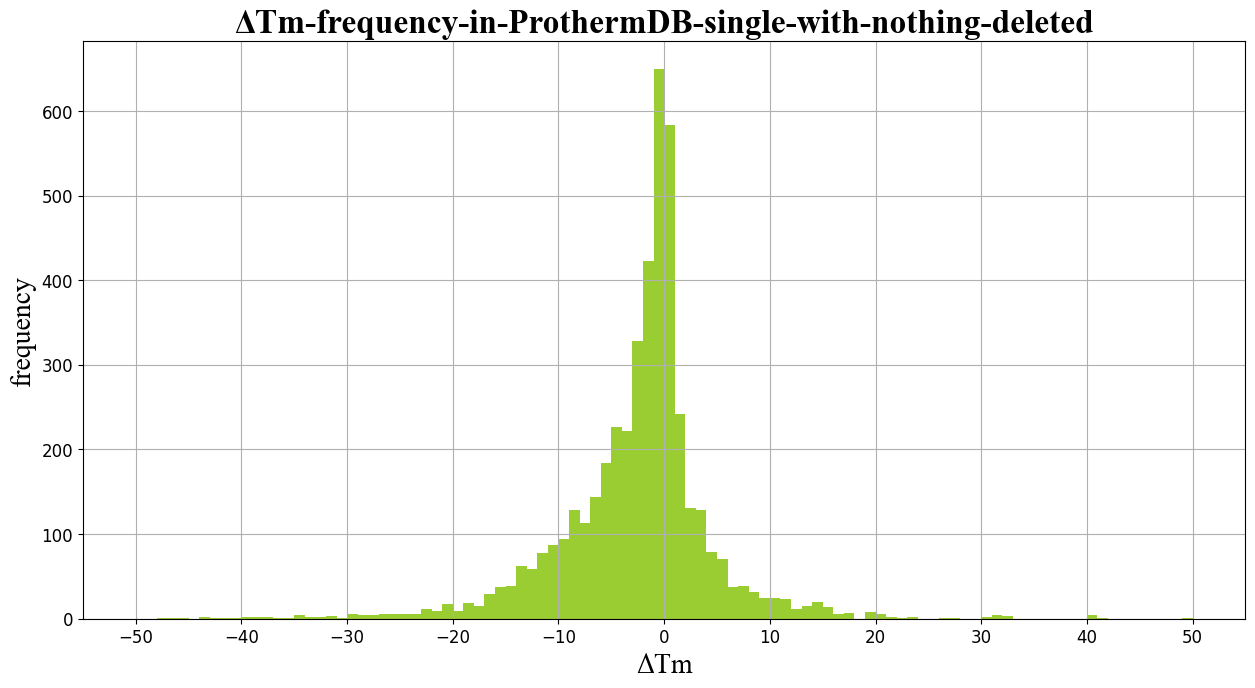

In [9]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(del_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-single-with-nothing-deleted",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 2.MPTherm-pred[缺失Tm，不对其进行分析]

In [10]:
MPTherm_pred_Training = pd.read_csv("BasicData/MPTherm-pred/MPTherm-pred_Training.csv")
MPTherm_pred_Testing = pd.read_csv("BasicData/MPTherm-pred/MPTherm-pred_Testing.csv")

# 3.MPThermDB

In [11]:
MPThermDB = pd.read_csv("BasicData/InitializationDataset/MPThermDB.tsv", sep="\t")[columns + ["ΔTm"]]
MPThermDB.sort_values(by=columns, inplace=True, ascending=False)
MPThermDB.reset_index(drop=True, inplace=True)
MPThermDB

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,W8VZW3,Y83A,72,7.5,-2.0
1,W8VZW3,W72A,71,7.5,-3.0
2,W8VZW3,F15A,74,7.5,0.0
3,Q9Y6R1-2,R298S,43,NaN,-5.0
4,Q9Y277,C8A,66.7,7.2,1.7
...,...,...,...,...,...
1862,A0A0E3N843,C557S,51.8 (0.4),7,0.2
1863,A0A0C4MBH9,D404E,76.5 (1.2),4,-6.4
1864,A0A0C4MBH9,D404A,75.8 (0.9),4,-7.1
1865,A0A0C4MBH9,D146E,77.4 (0.8),4,-5.5


### 3.1.清洗MPThermDB中的非法数据

In [12]:
MPThermDB, MPThermDb_washed = wash4MutTm(MPThermDB, avg_filling=True, focus_columns=columns)
MPThermDB

-删除数据缺失行及非法行共计117行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-对于实验条件pH，利用平均值进行补充，而pH的平均值为7.30985 -由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,pH,ΔTm
0,W8VZW3,Y83A,72.0,7.500000,-2.0
1,W8VZW3,W72A,71.0,7.500000,-3.0
2,W8VZW3,F15A,74.0,7.500000,0.0
3,Q9Y6R1-2,R298S,43.0,7.309852,-5.0
4,Q9Y277,C8A,66.7,7.200000,1.7
...,...,...,...,...,...
1745,A0A0E3N843,C557S,51.8,7.000000,0.2
1746,A0A0C4MBH9,D404E,76.5,4.000000,-6.4
1747,A0A0C4MBH9,D404A,75.8,4.000000,-7.1
1748,A0A0C4MBH9,D146E,77.4,4.000000,-5.5


### 3.2.检测是否存在多测量值

In [13]:
MPThermDB_mult_cnt, MPThermDB_mult_index = check4mult(MPThermDB, columns)
MPThermDB_multiple_deltaTm = MPThermDB.iloc[MPThermDB_mult_index, :]
print(f"MPThermDB数据库中存在{MPThermDB_mult_cnt}条多测量值")
MPThermDB_multiple_deltaTm

MPThermDB数据库中存在38条多测量值


,UniProt_ID,Mutation,Tm,pH,ΔTm
47,Q97UY8,G144A,72.8,6.5,0.3
48,Q97UY8,G144A,72.8,6.5,1.0
49,Q97UY8,E166Q,84.0,6.5,5.5
50,Q97UY8,E166Q,84.0,6.5,1.4
54,Q97UY8,E166Q,80.2,6.5,1.7
55,Q97UY8,E166Q,80.2,6.5,-2.4
65,Q97UY8,E166A,83.3,6.5,0.9
66,Q97UY8,E166A,83.3,6.5,4.8
67,Q97UY8,E166A,83.3,6.5,0.7
70,Q97UY8,E166A,79.9,6.5,-2.5


### 3.2.1.删除所有多测量值

### 3.2.2.平均所有多测量值

In [14]:
del_MPThermDB = duplicate4MutTm(MPThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB = duplicate4MutTm(MPThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,A0A0C4MBH9,D146A,77.6,4.000000,-5.3
1,A0A0C4MBH9,D146E,77.4,4.000000,-5.5
2,A0A0C4MBH9,D404A,75.8,4.000000,-7.1
3,A0A0C4MBH9,D404E,76.5,4.000000,-6.4
4,A0A0E3N843,C557S,51.8,7.000000,0.2
...,...,...,...,...,...
1724,Q9Y277,C8A,66.7,7.200000,1.7
1725,Q9Y6R1-2,R298S,43.0,7.309852,-5.0
1726,W8VZW3,F15A,74.0,7.500000,0.0
1727,W8VZW3,W72A,71.0,7.500000,-3.0


### 3.3.针对不同多测量值策略进行数据分析

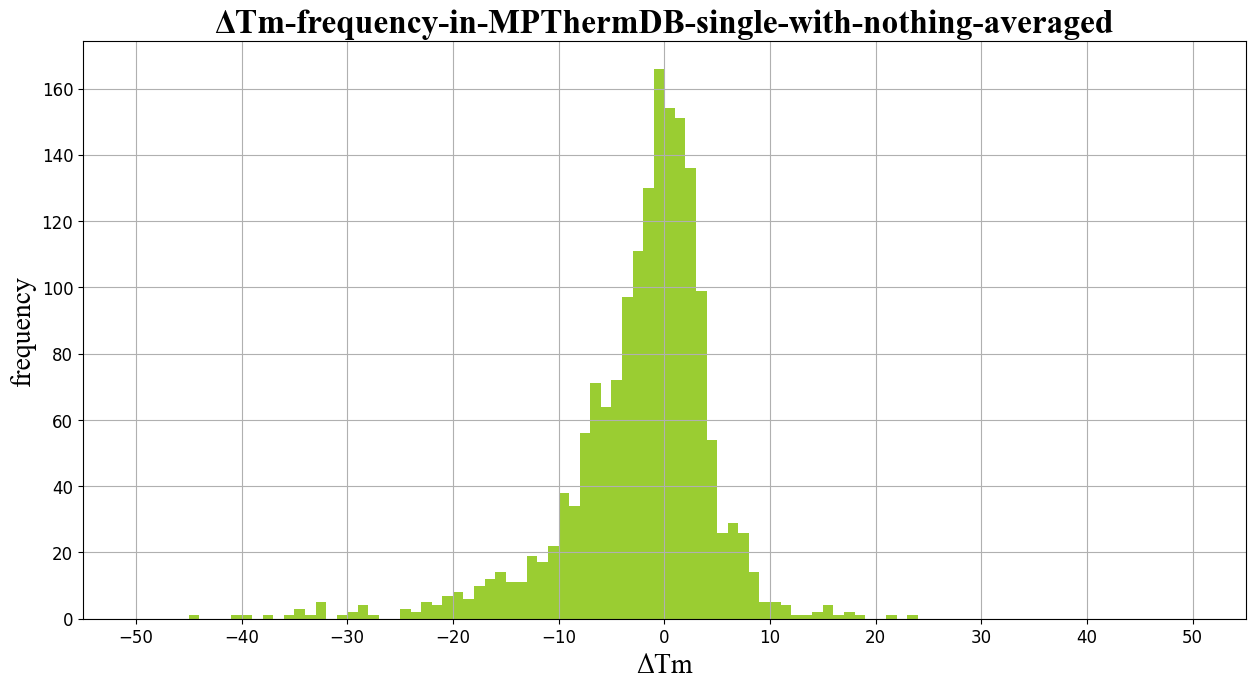

In [15]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

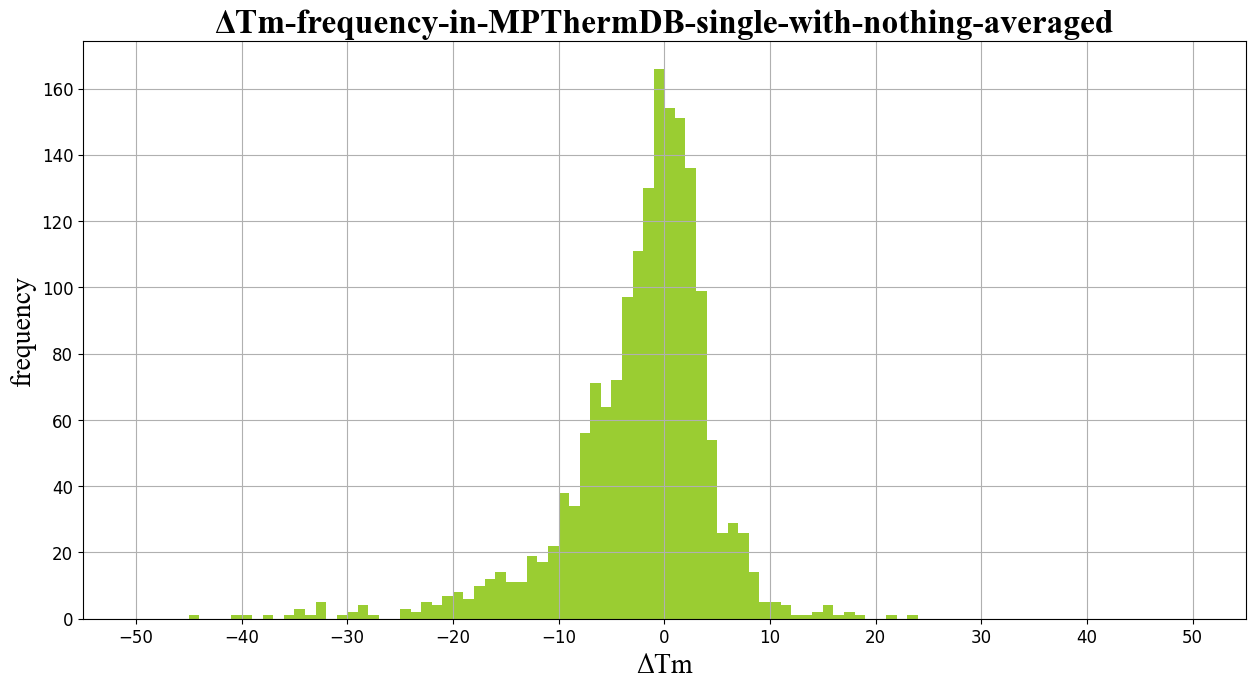

In [16]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

# 4.HotMuSiC

In [17]:
HotMusic = pd.read_csv("BasicData/InitializationDataset/HotMuSiC_source.csv")[["PDBid", "RESN", "RESwt", "RESmut", "Tm", "ΔTm", "pH"]]       # add Tm
pdb2uid_ref = json.load(open("./Process4Dataset/feature_extractor/IDConvert/pdb2uid.json", "r"))

# 由于该数据库的映射关系与其他数据库存在差异，先进行处理

In [18]:
# PDBid转换为UniProt ID
import tqdm
def get_uniprot_id(pdb_id):
    return pdb2uid_ref[pdb_id] if pdb_id in pdb2uid_ref else "None"

# MutationInfoTrasfer
ref = {"ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C", "GLN": "Q", "GLU": "E", "GLY": "G", "HIS": "H", "ILE": "I", "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P", "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"}
def part2Mutation(animo_acid_from, animo_acid_to, animo_acid_position):
    try:
        return f"{ref[animo_acid_from]}{int(animo_acid_position)}{ref[animo_acid_to]}"
    except Exception:
        return "Fault"

In [19]:
HotMusic.insert(loc=HotMusic.shape[1], column="Mutation", value="")
for rowIndex, row in HotMusic.iterrows():
    HotMusic.loc[rowIndex, "Mutation"] =  part2Mutation(row["RESwt"], row["RESmut"], row["RESN"])

In [20]:
HotMusic.insert(loc=HotMusic.shape[1], column="UniProt_ID", value="")
deleteIndex = []
with tqdm.tqdm(total=HotMusic.shape[0]) as pbar:
    for rowIndex, row in HotMusic.iterrows():
        uid = get_uniprot_id(row["PDBid"])
        if uid == "None":
            deleteIndex.append(rowIndex)
        else:
            HotMusic.loc[rowIndex, "UniProt_ID"] =  uid
        pbar.update(1)
print(f"HotMusic中删除了{len(deleteIndex)} / {HotMusic.shape[0]}条由于PDBid无法转换为UniPortID的数据")
HotMusic.drop(index=deleteIndex, inplace=True)

100%|██████████| 1627/1627 [00:00<00:00, 18671.55it/s]

HotMusic中删除了384 / 1627条由于PDBid无法转换为UniPortID的数据


In [21]:
HotMusic = HotMusic[columns + ["ΔTm"]]
HotMusic.sort_values(by=columns, inplace=True, ascending=False)
HotMusic.reset_index(drop=True, inplace=True)
HotMusic

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,Q9ZEU2,Y147N,47.8,[7.0],-1.0
1,Q9ZEU2,Y147F,47.8,[7.0],-0.2
2,Q9ZEU2,Y147A,47.8,[7.0],-1.0
3,Q9ZEU2,R509A,47.8,[7.0],0.0
4,Q9ZEU2,R446F,47.8,[7.0],0.2
...,...,...,...,...,...
1238,D4Z2G1,A129V,51.0,[7.5],-1.5
1239,A8PUY1,N277V,54.6,[6.0],-13.5
1240,A8PUY1,N277L,54.6,[6.0],-12.0
1241,A8PUY1,N277F,54.6,[6.0],-16.3


In [22]:
HotMusic.to_csv("BasicData/InitializationDataset/HotMusic.csv", index=False)

### 4.1.清洗HotMusic中的非法数据

In [23]:
HotMusic, HotMusic_washed = wash4MutTm(HotMusic, avg_filling=True, focus_columns=columns)
HotMusic_washed

-删除数据缺失行及非法行共计2行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-对于实验条件pH，利用平均值进行补充，而pH的平均值为5.76758 -由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,pH,ΔTm
44,Q9ZEU2,Fault,47.8,[7.0],-0.2
1173,D4Z2G1,Fault,51.0,[7.5],0.0


### 4.2.检测是否存在多测量值

In [24]:
HotMusic_mult_cnt, HotMusic_mult_index = check4mult(HotMusic, columns)
HotMusic_multiple_deltaTm = HotMusic.iloc[HotMusic_mult_index, :]
print(f"HoTMuSiC数据库中存在{HotMusic_mult_cnt}条多测量值")
HotMusic_multiple_deltaTm

HoTMuSiC数据库中存在4条多测量值


,UniProt_ID,Mutation,Tm,pH,ΔTm
703,P00720,S117F,65.1,5.4,2.8
704,P00720,S117F,65.1,5.4,2.8
868,P00720,A98V,65.1,3.0,-9.2
869,P00720,A98V,65.1,3.0,-13.0


### 4.3.对多测量值进行处理

In [25]:
del_HotMusic = duplicate4MutTm(HotMusic, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_HotMusic = duplicate4MutTm(HotMusic, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_HotMusic

,UniProt_ID,Mutation,Tm,pH,ΔTm
0,A8PUY1,N277D,54.6,6.0,2.0
1,A8PUY1,N277F,54.6,6.0,-16.3
2,A8PUY1,N277L,54.6,6.0,-12.0
3,A8PUY1,N277V,54.6,6.0,-13.5
4,D4Z2G1,A129V,51.0,7.5,-1.5
...,...,...,...,...,...
1234,Q9ZEU2,R446F,47.8,7.0,0.2
1235,Q9ZEU2,R509A,47.8,7.0,0.0
1236,Q9ZEU2,Y147A,47.8,7.0,-1.0
1237,Q9ZEU2,Y147F,47.8,7.0,-0.2


### 4.4.绘制HotMusic分布图

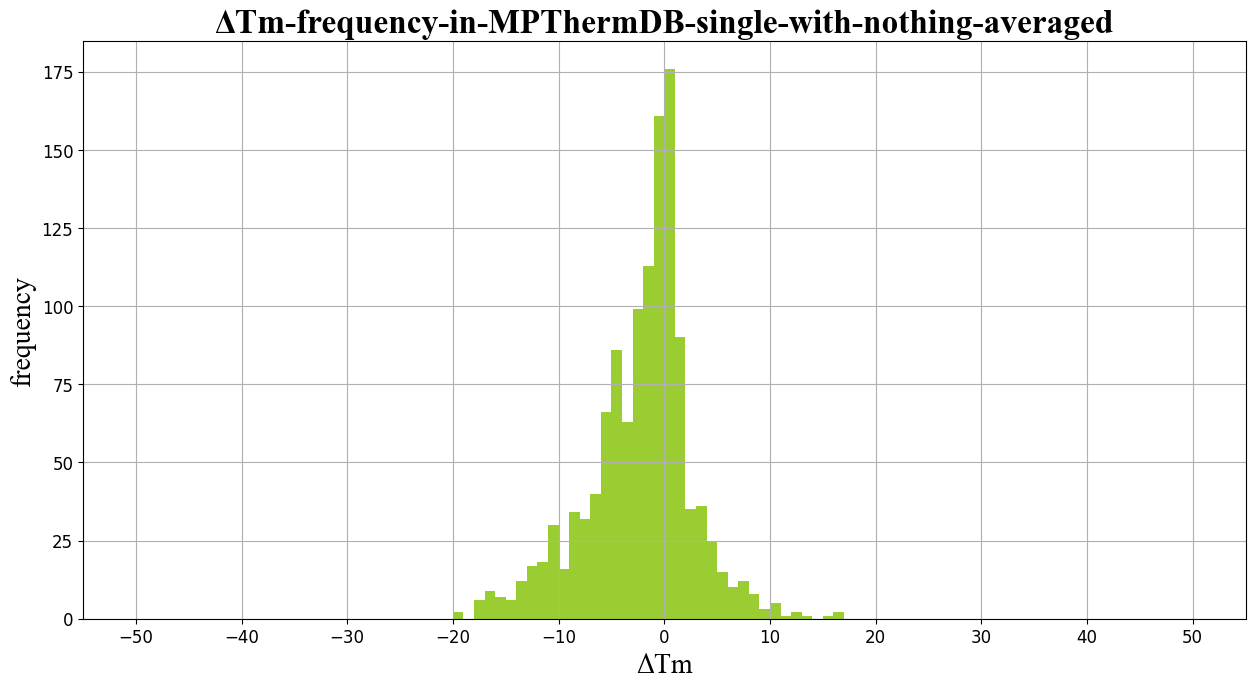

In [26]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

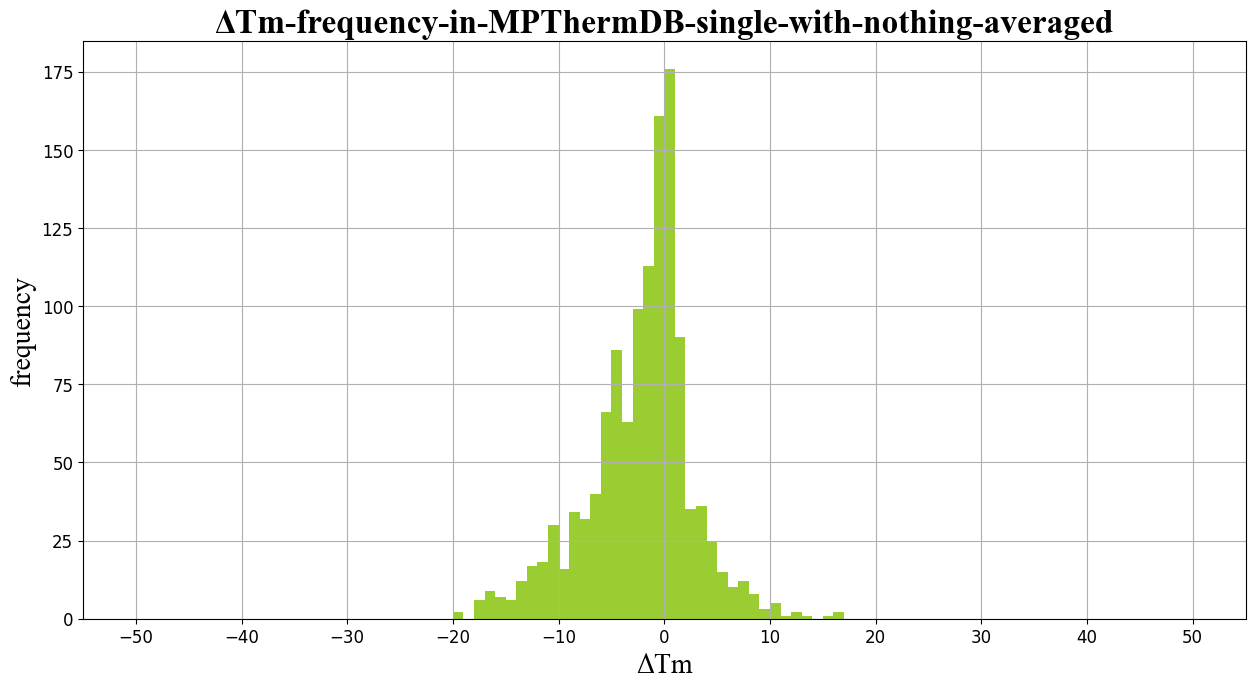

In [27]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

# 5.各数据集之间的引用关系[以ProThermDB为基本数据集]

In [28]:
def Check4Dup(quote_df: pd.DataFrame, df: pd.DataFrame) -> list:
    def CreateDict(_df: pd.DataFrame) -> set:
        occur = set()
        for rowIndex, row in _df.iterrows():
            occur.add("@".join(map(str, row)))
        return occur

    def check(_df: pd.DataFrame, occur: set) -> list:
        indexs = []
        for rowIndex, row in _df[columns].iterrows():
            if "@".join(map(str, row)) in occur:
                indexs .append(rowIndex)
        return indexs

    mtdData = CreateDict(df[columns])  # 构建在MPTherm中出现过的数据集合
    return check(quote_df, mtdData)  # 检验有多少测试集数据出现在我们的数据集中，并返回处理后数据集

### 5.1.MPThermDB对ProThermDB的引用关系

In [29]:
MPThermDB_ProThermDb_duplicateIndex = Check4Dup(avg_ProThermDB, avg_MPThermDB)
print("MPThermDB采用了ProThermDB中的{}条数据".format(len(MPThermDB_ProThermDb_duplicateIndex)))

MPThermDB采用了ProThermDB中的51条数据


### 5.2.MPTherm-pred对MPThermDB的引用关系[缺失Tm，不进行比较]

### 5.3.HotMusic对MPThermDB的引用关系

In [30]:
HotMusic_ProThermDB_duplicateIndex = Check4Dup(avg_ProThermDB, avg_HotMusic)
print("HotMusic采用了ProThermDB中的{}条数据".format(len(HotMusic_ProThermDB_duplicateIndex)))

HotMusic采用了ProThermDB中的18条数据


###  5.3.保存PonDB[预先划分测试集(比例0.05)]

# 6.为研究全全体球蛋白预测-在ProthermDB数据集中分割一个盲测集

In [31]:
excllent_ProThermDB = avg_ProThermDB.copy()
exllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_MPThermDB, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_HotMusic, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, MPTherm_pred_Training, columns[:-2])
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, MPTherm_pred_Testing, columns[:-2])
excllent_ProThermDB

-前一数据集采用了后一数据集中的51条数据，现已删除
-前一数据集采用了后一数据集中的18条数据，现已删除
-前一数据集采用了后一数据集中的21条数据，现已删除
-前一数据集采用了后一数据集中的15条数据，现已删除


,UniProt_ID,Mutation,Tm,pH,ΔTm
0,A0A060GYS1,H22R,88.0,7.5,9.9
1,A0A060GYS1,P224R,84.3,7.5,2.3
2,A0A410ZNC6,A341S,33.6,7.5,3.6
3,A0A410ZNC6,F184L,31.0,7.5,1.0
4,A0A410ZNC6,P250L,34.5,7.5,4.5
...,...,...,...,...,...
4705,R9S082,T52A,79.4,9.6,-2.8
4706,R9S082,T68A,81.7,9.6,-0.5
4707,R9S082,V115A,79.3,9.6,-2.9
4708,R9S082,V14A,80.9,9.6,-1.3


###  读取ProThermDB测试集

In [32]:
Common_Test = pd.read_csv("D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\Common\excllent_ProThermDB_Testing4Comparison.csv")
Common_Test

,UniProt_ID,Mutation,ΔTm,PDB_Chain_Mutation,PDB_ID,Chain,PDB_Mutation,HotMuSiC,AUTO-MUTE2.0-AdaClass,AUTOMUTE2.0-SVM,AUTO-MUTE2.0-REPTree,AUTO-MUTE2.0-SVR,MPTherm-pred
0,P03050,S5A,-1.50,1arr_A:S5A,1arr,A,S5A,-4.19,-1,-1,-2.50,-1.50,-2.761
1,Q13526,T29A,-14.30,1pin_A:T29A,1pin,A,T29A,-8.83,-,-,-,-,-10.837
2,P07845,Y111N,0.00,1gwy_A:Y111N,1gwy,A,Y111N,-3.58,-1,-1,-2.70,-1.80,-5.861
3,P00711,D106N,19.60,1hfz_A:D87N,1hfz,A,D87N,-1.55,-,-,-,-,-7.088
4,Q15059,H395R,-2.60,3s92_A:H395R,3s92,A,H395R,-2.59,-,-,-,-,-7.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,P61495,H179K,-1.05,1osi_A:H179K,1osi,A,H179K,0.42,-1,-1,-15.21,-3.67,-1.236
263,P00044,F16M,-15.20,1ycc_A:F10M,1ycc,A,F10M,-3.94,-,-,-,-,-3.561
264,P00644,T144Q,-12.95,1stn_A:T62Q,1stn,A,T62Q,-2.91,-1,-1,-1.51,-5.19,-1.162
265,P05798,L21A,-1.60,1rgg_A:L21A,1rgg,A,L21A,-3.80,-1,1,-12.42,1.12,-6.895


### 扩充测试集中的Tm条件

In [33]:
excllent_ProThermDB_Testing = select4Dup(excllent_ProThermDB, Common_Test, columns[:-2])

-前一数据集采用了后一数据集中的360条数据，现返回该重叠数据集


In [34]:
excllent_ProThermDB_Training = delete4Dup(excllent_ProThermDB, excllent_ProThermDB_Testing, columns)

-前一数据集采用了后一数据集中的360条数据，现已删除


In [35]:
# excllent_ProThermDB_Testing.to_csv("BasicData/ProThermDB/pH-Tm/excllent_ProThermDB_Testing.csv", index=False)
# excllent_ProThermDB_Training.to_csv("BasicData/ProThermDB/pH-Tm/excllent_ProThermDB_Training.csv", index=False)

### 7.拼接所有可用训练集为PonDB

In [36]:
PonDB = pd.concat([avg_HotMusic, avg_MPThermDB, avg_ProThermDB], axis=0, ignore_index=True).drop_duplicates(subset=columns, keep=False).reset_index(drop=True)
PonDB = delete4Dup(PonDB, MPTherm_pred_Testing, columns[:-2])
PonDB = delete4Dup(PonDB, excllent_ProThermDB_Testing, columns)
PonDB

-前一数据集采用了后一数据集中的158条数据，现已删除
-前一数据集采用了后一数据集中的360条数据，现已删除


,UniProt_ID,Mutation,Tm,pH,ΔTm
0,A8PUY1,N277D,54.6,6.0,2.0
1,A8PUY1,N277F,54.6,6.0,-16.3
2,A8PUY1,N277L,54.6,6.0,-12.0
3,A8PUY1,N277V,54.6,6.0,-13.5
4,D4Z2G1,A129V,51.0,7.5,-1.5
...,...,...,...,...,...
7071,R9S082,T52A,79.4,9.6,-2.8
7072,R9S082,T68A,81.7,9.6,-0.5
7073,R9S082,V115A,79.3,9.6,-2.9
7074,R9S082,V14A,80.9,9.6,-1.3


# 7.1.绘制图像

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
# PonDB = pd.read_csv("BasicData/PonDB/pH-Tm/PonDB.csv")

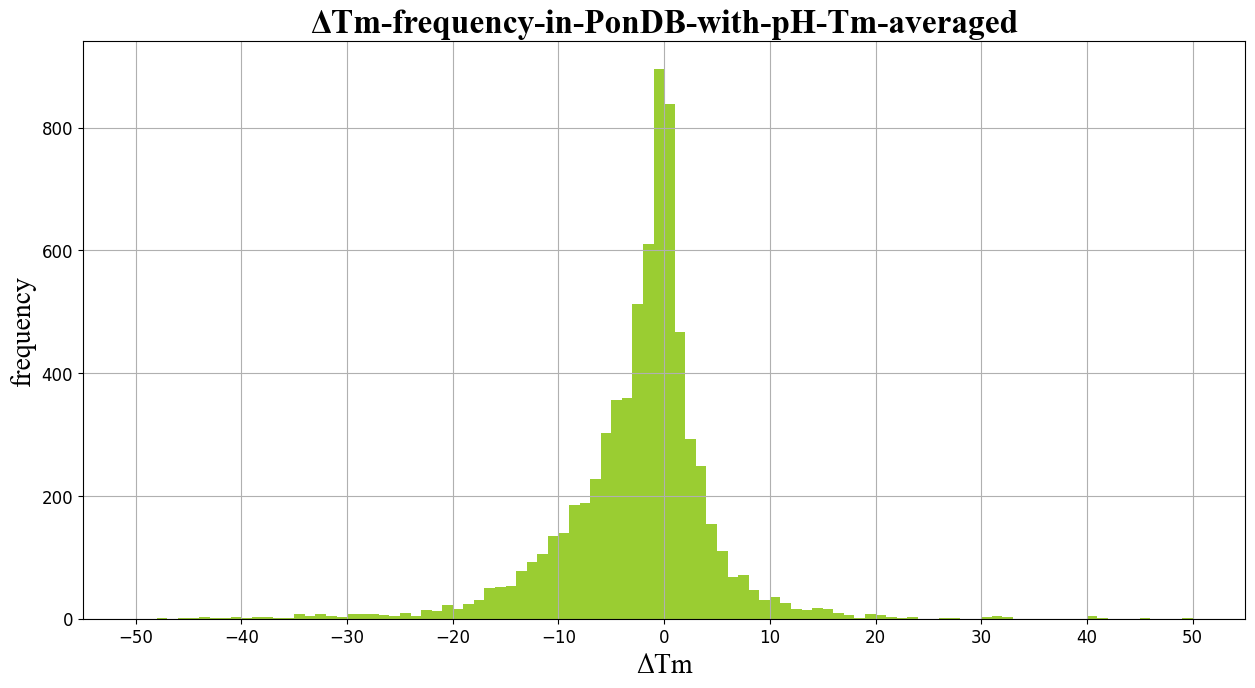

In [38]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(PonDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-PonDB-with-pH-Tm-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "grey"
plt.grid()
plt.show()

### 7.2.PonDB全部作为训练集

In [39]:
# PonDB.to_csv("BasicData/PonDB/pH-Tm/PonDB.csv", index=False)

In [40]:
PonDB["ΔTm"]

0        2.0
1      -16.3
2      -12.0
3      -13.5
4       -1.5
        ... 
7071    -2.8
7072    -0.5
7073    -2.9
7074    -1.3
7075     1.4
Name: ΔTm, Length: 7076, dtype: object

In [41]:
PonDB["ΔTm"].var()

56.414460651322344